# Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

# Functions

In [2]:
#Проверка столбца (dtype object) на наличие уникальных значений и их количество 
def object_check(column):
    display(pd.DataFrame(column.value_counts()))
    print(column.unique())

#Проверка столбца (dtype float) при помощи гистограммы и 
#его характеристики (количество значений в столбце, среднее, стандартное отклонение, минимальное,
#25-й процентиль, 50-й процентиль, 75-й процентиль и максимальное)
def float_check(column):
    column.hist()
    print(column.describe())


# При добавлении нового столбца (dummy перменной) 
# ставим 1 - при наличии, 0 - при отсутствии
def find_item(cell):
    if item in cell:
        return 1
    return 0


# Проверка отсутствия значений в столбце
def procent_check(column, df):
    math = 100 - ((df[column].count() * 100) / len(df))
    print("В столбце",column,"отсутствует", '\033[4m' + str(round(math, 2)),"процентов" + '\033[0m',"информации.")
    
# Вывод основных статистических данных категориальных признаков
def categorical_check(column):
    display(pd.DataFrame(df[column].value_counts()))
    print(df[column].describe())

# Построение гистограммы и вывод основных статистических данных цифровых признаков
def numerical_check(column):
    display(df[column].hist(bins=100))
    print(df[column].describe())
    

# Короткая проверка датасета
def df_check(df):
    display(df.head())
    display(df.info())
    
def replace_nan(df,column):
    return df[column].astype(str).apply(lambda x: 'Unknown' if x == 'nan' else x)

# ---------------------------- Data ----------------------------

# Информация

### Customers:

* <i>CustomerKey</i> : ID клиента
* <i> FirstName</i> : Имя клиента 
* <i> LastName</i> : Фамилия клиента
* <i> Full Name</i> : Имя и Фамилия клиента
* <i> BirthDate</i> : День рождения клиента
* <i> AgeOfCustomer</i> : Возраст клиента на момент заказа
<br> &#10149; (данные получены при помощи 'BirthDate' и 'DateFirstPurchase')
* <i> Gender</i> : Пол клиента
* <i> DateFirstPurchase</i> : Дата заказа товара 
* <i> Customer City</i> : Город клиента

### Sales:

* <i> ProductKey</i> : ID товара
* <i> OrderDateKey</i> : ID Даты заказа
* <i> DueDateKey</i> : ID Срока сдачи
* <i> ShipDateKey</i> : ID Даты отправки 
* <i> SalesOrderNumber</i> : Номер поставки
* <i> SalesAmount</i> : Объем продаж

### Products:

* <i> ProductKey</i> : ID клиента
* <i> ProductItemCode</i> : Серия товара 
* <i> Product Name</i> : Название товара
* <i> Sub Category</i> : Подкатегория товара
* <i> Product Category</i> : Категория товара
* <i> StandardCost</i> : Стоимость товара
* <i> Product Color</i> : Цвет товара
* <i> Product Size</i> : Размер товара 
* <i> Product Line</i> : Линия товара
* <i> Model Name</i> : Название модели
* <i> Product Description</i> : Описание товара
* <i> Product Description DE</i> : Описание товара на немецком  
* <i> Product Status</i> : Статус товара

### Calendar:

* <i> OrderDateKey</i> : ID даты
* <i> Date</i> : Дата 
* <i> Day</i> : День
* <i> Month</i> : Месяц
* <i> MonthShort</i> : Месяц сокр.
* <i> MonthNr</i> : Номер месяца
* <i> Quarter</i> : Квартал
* <i> Year</i> : Год

# Готовим датасеты

### Даты

In [3]:
calendar = pd.read_csv('DIM_Calendar.csv', sep = ';')

In [4]:
calendar = calendar.rename(columns={'DateKey': 'OrderDateKey'})

In [5]:
df_check(calendar)

OrderDateKey        Date        Day    Month MonthShort  MonthNr  Quarter  \
0      20190101  2019-01-01    Tuesday  January        Jan        1        1   
1      20190102  2019-01-02  Wednesday  January        Jan        1        1   
2      20190103  2019-01-03   Thursday  January        Jan        1        1   
3      20190104  2019-01-04     Friday  January        Jan        1        1   
4      20190105  2019-01-05   Saturday  January        Jan        1        1   

   Year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderDateKey  1096 non-null   int64 
 1   Date          1096 non-null   object
 2   Day           1096 non-null   object
 3   Month         1096 non-null   object
 4   MonthShort    1096 non-null   object
 5   MonthNr       1096 non-null   int64 
 6   Quarter       1096 non-null   int64 
 7   Year          1096 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 68.6+ KB


None

### Клиенты

In [6]:
customers = pd.read_csv('DIM_Customer.csv', sep = ';')

In [7]:
df_check(customers)

CustomerKey  FirstName LastName         Full Name   BirthDate  \
0        11000        Jon     Yang           JonYang  1971-10-06   
1        11001     Eugene    Huang       EugeneHuang  1976-05-10   
2        11002      Ruben   Torres       RubenTorres  1971-02-09   
3        11003    Christy      Zhu        ChristyZhu  1973-08-14   
4        11004  Elizabeth  Johnson  ElizabethJohnson  1979-08-05   

   AgeOfCustomer  Gender DateFirstPurchase Customer City Region Code  \
0             47    Male        2018-01-19   Rockhampton          AU   
1             42    Male        2018-01-15       Seaford          AU   
2             47    Male        2018-01-07        Hobart          AU   
3             44  Female        2017-12-29    North Ryde          AU   
4             39  Female        2018-01-23    Wollongong          AU   

  State Code  
0        QLD  
1        VIC  
2        TAS  
3        NSW  
4        NSW

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerKey        18484 non-null  int64 
 1   FirstName          18484 non-null  object
 2   LastName           18484 non-null  object
 3   Full Name          18484 non-null  object
 4   BirthDate          18484 non-null  object
 5   AgeOfCustomer      18484 non-null  int64 
 6   Gender             18484 non-null  object
 7   DateFirstPurchase  18484 non-null  object
 8   Customer City      18484 non-null  object
 9   Region Code        18484 non-null  object
 10  State Code         18484 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.6+ MB


None

8 клиентов старше 100 лет. Что составляет 0.04 % от количества клиентов.
221 клиентов от 80 до 100 лет. Что составляет 1.2 % от количества клиентов.
3929 клиентов от 60 до 80 лет. Что составляет 21.26 % от количества клиентов.
4589 клиентов от 50 до 60 лет. Что составляет 24.83 % от количества клиентов.
6409 клиентов от 40 до 50 лет. Что составляет 34.67 % от количества клиентов.
3328 клиентов от 30 до 40 лет. Что составляет 18.0 % от количества клиентов.
0 клиентов от 20 до 30 лет. Что составляет 0.0 % от количества клиентов.


<AxesSubplot:>

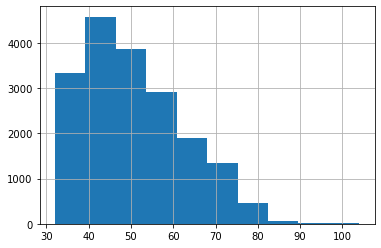

In [8]:
print(len(customers[(customers['AgeOfCustomer'] > 100)]),"клиентов старше 100 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] > 100)]) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] <= 100) &(customers['AgeOfCustomer'] >= 80)] ),"клиентов от 80 до 100 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] <= 100) &(customers['AgeOfCustomer'] >= 80)] )* 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] <= 79) &(customers['AgeOfCustomer'] >= 60)] ),"клиентов от 60 до 80 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 60) &(customers['AgeOfCustomer'] <= 79)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] >= 50) &(customers['AgeOfCustomer'] <= 59)] ),"клиентов от 50 до 60 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 50) &(customers['AgeOfCustomer'] <= 59)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] >= 40) &(customers['AgeOfCustomer'] <= 49)] ),"клиентов от 40 до 50 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 40) &(customers['AgeOfCustomer'] <= 49)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] >= 30) &(customers['AgeOfCustomer'] <= 39)] ),"клиентов от 30 до 40 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 30) &(customers['AgeOfCustomer'] <= 39)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

print(len(customers[(customers['AgeOfCustomer'] >= 20) &(customers['AgeOfCustomer'] <= 29)] ),"клиентов от 20 до 30 лет. Что составляет",
     round((len(customers[(customers['AgeOfCustomer'] >= 20) &(customers['AgeOfCustomer'] <= 29)] ) * 100) / len(customers['AgeOfCustomer']), 2), "% от количества клиентов.")

customers['AgeOfCustomer'].hist()

In [9]:
# Проверяем датасет на наличие пустых значений
customers.columns[customers.isnull().any()]

Index([], dtype='object')

In [10]:
# Избавляемся ненужных столбцов

# -- FirstName
# -- LastName

# так как мы заранее создали столбец возраста 
# в SQL, удалим следующие столбцы:

# -- BirthDate
# -- DateFirstPurchase

customers = customers.drop(['FirstName', 'LastName', 'BirthDate', 'DateFirstPurchase'], axis = 1)

### Продажи

In [11]:
# Продажи

sales = pd.read_csv('DIM_OnlineSales.csv', sep = ';')

In [12]:
df_check(sales)

ProductKey  OrderDateKey  DueDateKey  ShipDateKey  CustomerKey  \
0         381      20190101    20190113     20190108        16942   
1         375      20190101    20190113     20190108        15114   
2         369      20190101    20190113     20190108        15116   
3         337      20190101    20190113     20190108        20576   
4         370      20190101    20190113     20190108        13059   

  SalesOrderNumber SalesAmount  
0          SO46700   1000,4375  
1          SO46701   2181,5625  
2          SO46702     2443,35  
3          SO46703      782,99  
4          SO46704     2443,35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58168 entries, 0 to 58167
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductKey        58168 non-null  int64 
 1   OrderDateKey      58168 non-null  int64 
 2   DueDateKey        58168 non-null  int64 
 3   ShipDateKey       58168 non-null  int64 
 4   CustomerKey       58168 non-null  int64 
 5   SalesOrderNumber  58168 non-null  object
 6   SalesAmount       58168 non-null  object
dtypes: int64(5), object(2)
memory usage: 3.1+ MB


None

In [13]:
# Проверяем датасет на наличие пустых значений
sales.columns[sales.isnull().any()]

Index([], dtype='object')

In [14]:
# Избавляемся от ненужных столбцов:
# -- OrderDateKey
# -- DueDateKey
# -- ShipDateKey
# -- SalesOrderNumber

sales = sales.drop(['DueDateKey', 'ShipDateKey', 'SalesOrderNumber'], axis = 1)

In [15]:
# Переведем столбец -- SalesAmount в float
# 1 способ

sales['SalesAmount'] = pd.to_numeric(sales['SalesAmount'].str.replace(",", "."))

In [16]:
# Переведем столбец -- SalesAmount в float
# 2 способ

# sales.SalesAmount = sales.SalesAmount.astype(str).apply(lambda x: float(str(x).replace(",", "."))) 

### Товары

In [17]:
products = pd.read_csv('DIM_Product.csv', sep = ';')

In [18]:
df_check(products)

ProductKey ProductItemCode           Product Name Sub Category  \
0           1         AR-5381        Adjustable Race          NaN   
1           2         BA-8327           Bearing Ball          NaN   
2           3         BE-2349        BB Ball Bearing          NaN   
3           4         BE-2908  Headset Ball Bearings          NaN   
4           5         BL-2036                  Blade          NaN   

  Product Category StandardCost Product Color Product Size Product Line  \
0              NaN          NaN           NaN          NaN          NaN   
1              NaN          NaN           NaN          NaN          NaN   
2              NaN          NaN           NaN          NaN          NaN   
3              NaN          NaN           NaN          NaN          NaN   
4              NaN          NaN           NaN          NaN          NaN   

  Model Name Product Description Product Description DE Product Status  
0        NaN                 NaN                    NaN        Current  
1        NaN                 NaN                    NaN        Current  
2        NaN                 NaN                    NaN        Current  
3        NaN                 NaN                    NaN        Current  
4        NaN                 NaN                    NaN        Current

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductKey              606 non-null    int64 
 1   ProductItemCode         606 non-null    object
 2   Product Name            606 non-null    object
 3   Sub Category            397 non-null    object
 4   Product Category        397 non-null    object
 5   StandardCost            395 non-null    object
 6   Product Color           352 non-null    object
 7   Product Size            299 non-null    object
 8   Product Line            380 non-null    object
 9   Model Name              397 non-null    object
 10  Product Description     396 non-null    object
 11  Product Description DE  396 non-null    object
 12  Product Status          606 non-null    object
dtypes: int64(1), object(12)
memory usage: 61.7+ KB


None

In [19]:
# Проверяем столбцы, в которых пустые значения

products.columns[products.isnull().any()]

Index(['Sub Category', 'Product Category', 'StandardCost', 'Product Color',
       'Product Size', 'Product Line', 'Model Name', 'Product Description',
       'Product Description DE'],
      dtype='object')

In [20]:
# Проверяем процент пустых значений

procent_check('Sub Category', products)
procent_check('Product Category', products)
procent_check('StandardCost', products)
procent_check('Product Color', products)
procent_check('Product Size', products)
procent_check('Product Line', products)
procent_check('Model Name', products)
procent_check('Product Description', products)
procent_check('Product Description DE', products)

В столбце Sub Category отсутствует 34.49 процентов информации.
В столбце Product Category отсутствует 34.49 процентов информации.
В столбце StandardCost отсутствует 34.82 процентов информации.
В столбце Product Color отсутствует 41.91 процентов информации.
В столбце Product Size отсутствует 50.66 процентов информации.
В столбце Product Line отсутствует 37.29 процентов информации.
В столбце Model Name отсутствует 34.49 процентов информации.
В столбце Product Description отсутствует 34.65 процентов информации.
В столбце Product Description DE отсутствует 34.65 процентов информации.


In [21]:
# Столбец -- StandardCost хранит в себе данные о стоимости товара
# Необходимо поменять тип этих данных и найти решение на замену 
# пустых показателей

products["StandardCost"] = pd.to_numeric(products["StandardCost"].str.replace(',','.'))

In [22]:
products["StandardCost"].fillna(value = 0, inplace = True)

In [23]:
# Когда мы поменяли значение NaN на 0,
# мы можем проверить гиптозу о наличии товара идентичного в списке

search_for_null = products.ProductItemCode[products["StandardCost"] == 0]
search_for_value = products.ProductItemCode[products["StandardCost"] > 0]

In [24]:
test_for_value = {}

for item in search_for_null:
    test_for_value[item] = 0

for item in test_for_value:
    for cell in search_for_value:
        if cell == item:
            test_for_value[item] +=1
        else:
            0

In [25]:
# Убедимся, что товар был уникальным и не встречается в датасете более 1 раза
display(sum(map((0).__eq__, test_for_value.values())))
test_for_value.items()

211

dict_items([('AR-5381', 0), ('BA-8327', 0), ('BE-2349', 0), ('BE-2908', 0), ('BL-2036', 0), ('CA-5965', 0), ('CA-6738', 0), ('CA-7457', 0), ('CB-2903', 0), ('CN-6137', 0), ('CR-7833', 0), ('CR-9981', 0), ('CS-2812', 0), ('DC-8732', 0), ('DC-9824', 0), ('DT-2377', 0), ('EC-M092', 0), ('EC-R098', 0), ('EC-T209', 0), ('FE-3760', 0), ('FH-2981', 0), ('FW-1000', 0), ('FW-1200', 0), ('FW-1400', 0), ('FW-3400', 0), ('FW-3800', 0), ('FW-5160', 0), ('FW-5800', 0), ('FW-7160', 0), ('FW-9160', 0), ('FC-3654', 0), ('FC-3982', 0), ('FL-2301', 0), ('GP-0982', 0), ('GT-0820', 0), ('GT-1209', 0), ('GT-2908', 0), ('HJ-1213', 0), ('HJ-1220', 0), ('HJ-1420', 0), ('HJ-1428', 0), ('HJ-3410', 0), ('HJ-3416', 0), ('HJ-3816', 0), ('HJ-3824', 0), ('HJ-5161', 0), ('HJ-5162', 0), ('HJ-5811', 0), ('HJ-5818', 0), ('HJ-7161', 0), ('HJ-7162', 0), ('HJ-9080', 0), ('HJ-9161', 0), ('HN-1024', 0), ('HN-1032', 0), ('HN-1213', 0), ('HN-1220', 0), ('HN-1224', 0), ('HN-1420', 0), ('HN-1428', 0), ('HN-3410', 0), ('HN-3416', 

In [26]:
# Второй способ убедиться в этом:

search_for_null_new = products[products["StandardCost"] == 0]
search_for_null_new.groupby(products["StandardCost"] == 0, sort = True)['ProductItemCode'].value_counts()

StandardCost  ProductItemCode
True          AR-5381            1
              BA-8327            1
              BE-2349            1
              BE-2908            1
              BL-2036            1
                                ..
              SR-2098            1
              SS-2985            1
              ST-9828            1
              TO-2301            1
              TP-0923            1
Name: ProductItemCode, Length: 211, dtype: int64

In [27]:
# Убедимся, что название товара уникально

search_for_name = products['Product Name'][products["StandardCost"] == 0]

col = {}

for item in search_for_name:
    col[item] = 0

for item in col:
    for cell in search_for_name:
        if cell == item:
            col[item] +=1
        else:
            0

In [28]:
display(sum(map((1).__eq__, col.values())))
len(col)

211

211

In [29]:
# Так как не удалось восстановить данные 
# по причине отсутствия дополнительных сведений,
# мы избавляемся от ненужных данных,
# но сначала избавимся от ненужных нам столбцов

# Избавляемся от ненужных столбцов:
# -- ProductItemCode
# -- Product Color
# -- Product Size
# -- Product Line
# -- Model Name
# -- Product Status

products = products.drop(['ProductItemCode','Product Color','Product Size'
                         ,'Product Line','Model Name','Product Status'], axis = 1)

In [30]:
products.columns

Index(['ProductKey', 'Product Name', 'Sub Category', 'Product Category',
       'StandardCost', 'Product Description', 'Product Description DE'],
      dtype='object')

In [31]:
products = products.dropna(axis=0)

In [32]:
df_check(products)

ProductKey               Product Name Sub Category Product Category  \
209         210  HL Road Frame - Black, 58  Road Frames       Components   
210         211    HL Road Frame - Red, 58  Road Frames       Components   
211         212      Sport-100 Helmet, Red      Helmets      Accessories   
212         213      Sport-100 Helmet, Red      Helmets      Accessories   
213         214      Sport-100 Helmet, Red      Helmets      Accessories   

     StandardCost                                Product Description  \
209        0.0000  Our lightest and best quality aluminum frame m...   
210        0.0000  Our lightest and best quality aluminum frame m...   
211       12.0278  Universal fit, well-vented, lightweight , snap...   
212       13.8782  Universal fit, well-vented, lightweight , snap...   
213       13.0863  Universal fit, well-vented, lightweight , snap...   

                                Product Description DE  
209  Unser leichtester und hochwertigster Aluminium...  
210  Unser leichtester und hochwertigster Aluminium...  
211  "Einheitsgröße, atmungsaktiv, leicht, aufsetzb...  
212  "Einheitsgröße, atmungsaktiv, leicht, aufsetzb...  
213  "Einheitsgröße, atmungsaktiv, leicht, aufsetzb...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 209 to 605
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProductKey              396 non-null    int64  
 1   Product Name            396 non-null    object 
 2   Sub Category            396 non-null    object 
 3   Product Category        396 non-null    object 
 4   StandardCost            396 non-null    float64
 5   Product Description     396 non-null    object 
 6   Product Description DE  396 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ KB


None

In [33]:
# Проверим наличие нулевых значений

count = 0

for item in products.StandardCost:
    if item == 0:
        count += 1
        
print(count)

2


In [34]:
# Избавившись от строк с нулевыми значениями мы получили
# две строки, у которых в столбце StandardCost отсутствует значения
# Через схожую категорию и подкатегории мы найдем среднее значени и добавим его

mean_components = round(float(products.groupby((products['Sub Category'] == 'Road Frames') 
                 & (products['Product Category'] == 'Components')
                )['StandardCost'].mean().drop(False)), 6)
mean_components

409.164677

In [35]:
products.StandardCost = products.StandardCost.apply(lambda x: mean_components if x == 0 else x)

In [36]:
products.columns[products.isnull().any()]

Index([], dtype='object')

## Собираем единный датасет

In [37]:
data = pd.merge(customers, sales, on = ['CustomerKey'])

In [38]:
data_df = pd.merge(data, products, on = ['ProductKey'])

In [39]:
df = pd.merge(data_df, calendar, on = ['OrderDateKey']) 

In [40]:
df_check(df)

CustomerKey      Full Name  AgeOfCustomer  Gender Customer City  \
0        11000        JonYang             47    Male   Rockhampton   
1        11015     ChloeYoung             36  Female       Burbank   
2        11237  ClarenceAnand             54    Male      Solingen   
3        11403   NancySchmidt             39  Female    Saint Ouen   
4        11000        JonYang             47    Male   Rockhampton   

  Region Code State Code  ProductKey  OrderDateKey  SalesAmount  ...  \
0          AU        QLD         353      20200118      2319.99  ...   
1          US         CA         353      20200118      2319.99  ...   
2          DE         NW         353      20200118      2319.99  ...   
3          FR         17         353      20200118      2319.99  ...   
4          AU        QLD         485      20200118        21.98  ...   

  StandardCost                                Product Description  \
0    1265.6195  Serious back-country riding. Perfect for all l...   
1    1265.6195  Serious back-country riding. Perfect for all l...   
2    1265.6195  Serious back-country riding. Perfect for all l...   
3    1265.6195  Serious back-country riding. Perfect for all l...   
4       8.2205           Clip-on fenders fit most mountain bikes.   

                              Product Description DE        Date       Day  \
0  Mountainbike für Profis. Perfekt für alle Schw...  2020-01-18  Saturday   
1  Mountainbike für Profis. Perfekt für alle Schw...  2020-01-18  Saturday   
2  Mountainbike für Profis. Perfekt für alle Schw...  2020-01-18  Saturday   
3  Mountainbike für Profis. Perfekt für alle Schw...  2020-01-18  Saturday   
4  Schutzbleche zum Aufstecken passen auf fast al...  2020-01-18  Saturday   

     Month MonthShort MonthNr Quarter  Year  
0  January        Jan       1       1  2020  
1  January        Jan       1       1  2020  
2  January        Jan       1       1  2020  
3  January        Jan       1       1  2020  
4  January        Jan       1       1  2020  

[5 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58166 entries, 0 to 58165
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerKey             58166 non-null  int64  
 1   Full Name               58166 non-null  object 
 2   AgeOfCustomer           58166 non-null  int64  
 3   Gender                  58166 non-null  object 
 4   Customer City           58166 non-null  object 
 5   Region Code             58166 non-null  object 
 6   State Code              58166 non-null  object 
 7   ProductKey              58166 non-null  int64  
 8   OrderDateKey            58166 non-null  int64  
 9   SalesAmount             58166 non-null  float64
 10  Product Name            58166 non-null  object 
 11  Sub Category            58166 non-null  object 
 12  Product Category        58166 non-null  object 
 13  StandardCost            58166 non-null  float64
 14  Product Description     58166 non-null

None

# Предобработка

In [41]:
# Для удобства просмотра убираем 
# ограничения просмотра ячейки
pd.set_option('display.max_colwidth', None)

In [42]:
df.columns

Index(['CustomerKey', 'Full Name', 'AgeOfCustomer', 'Gender', 'Customer City',
       'Region Code', 'State Code', 'ProductKey', 'OrderDateKey',
       'SalesAmount', 'Product Name', 'Sub Category', 'Product Category',
       'StandardCost', 'Product Description', 'Product Description DE', 'Date',
       'Day', 'Month', 'MonthShort', 'MonthNr', 'Quarter', 'Year'],
      dtype='object')

In [43]:
# Переименуем индексы столбцов
df.columns = ['customer_key','full_name','customer_age',
              'gender','customer_city','region_code', 'state_code','product_key','date_key',
              'sales_amount','product_name','sub_category',
              'product_category','standard_cost','product_description',
              'product_description_de','date', 'day', 'month',
       'month_short', 'month_nr', 'quarter', 'year']

# Обработка

### customer_age

In [44]:
# Проверим возраст клиентов, тем самым узнаем возраст ЦА
# дополнительно построим гистограмму, для наглядности

object_check(df.customer_age)

customer_age
45           2248
44           2233
39           2207
41           2149
40           2110
..            ...
93              6
91              5
95              5
104             3
100             2

[72 rows x 1 columns]

[ 47  36  54  39  37  49  52  68  41  62  40  44  51  42  63  46  57  53
  43  66  34  67  60  55  35  38  32  50  45  72  48  74  76  64  61  56
 103  59  70  65  80  73  78  58  75  84  69  77  71  81  82  33  79  86
  92  90  88  93  83  98  89  97  85  91  96 104  87 101 102  95  94 100]


### gender

gender
Male     29266
Female   28900

['Male' 'Female']


<AxesSubplot:>

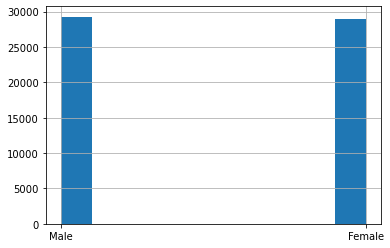

In [45]:
# Узнаем пол наших клиентов:
# Нашим товаром заинтересованы мужчины и женщины

object_check(df.gender)
df.gender.hist()

### customer_city

In [46]:
# Как мы видим, из многих городов заказывают наш товар
# Давайте выясним топ 15 городов

object_check(df.customer_city)

customer_city
London                1544
Paris                 1148
Cliffside              901
Berlin                 572
Chula Vista            567
...                    ...
Clay                     2
Bellevue                 1
Braintree                1
Chehalis                 1
Byron                    1

[268 rows x 1 columns]

['Rockhampton' 'Burbank' 'Solingen' 'Saint Ouen' 'Watford' 'Royal Oak'
 'Sedro Woolley' 'Chula Vista' 'City Of Commerce' 'Maidenhead' 'Roubaix'
 'London' 'Springwood' 'Versailles' 'Puyallup' 'Haney'
 'Verrieres Le Buisson' 'Seaford' 'Bendigo' 'Woodland Hills' 'Downey'
 'Wokingham' 'Les Ulis' 'Palo Alto' 'Malabar' 'Cloverdale' 'Colma' 'Croix'
 'Bellingham' 'Westminster' 'Novato' 'Neunkirchen' 'Santa Cruz'
 'Peterborough' 'Coronado' 'Darmstadt' 'Berlin' 'Burien' 'Kirkby'
 'Gateshead' 'Hawthorne' 'Cliffside' 'Torrance' 'Port Macquarie'
 'Port Orchard' 'Los Angeles' 'Silverwater' 'Stoke-on-Trent' 'Lemon Grove'
 'La Jolla' 'Frankfurt' 'El Cajon' 'Hervey Bay' 'Townsville'
 'North Sydney' 'Runcorn' 'Brisbane' 'Kirkland' 'Concord' 'Colomiers'
 'Bonn' 'Newcastle upon Tyne' 'Goulburn' 'Beverly Hills' 'Ballard'
 'Paderborn' 'Edmonds' 'St. Leonards' 'Burlingame' 'W. York' 'Paris'
 'Oregon City' 'Sydney' 'Orly' 'Saint-Denis' 'Berkeley' 'Sunbury'
 'Long Beach' 'Newport Beach' 'Port Hammond' 'Matravi

In [47]:
df.customer_city.value_counts().head(15)

London          1544
Paris           1148
Cliffside        901
Berlin           572
Chula Vista      567
Burien           563
Bellingham       549
Shawnee          549
N. Vancouver     546
Berkeley         546
Concord          540
Beaverton        535
Burlingame       516
Bellflower       511
Langley          511
Name: customer_city, dtype: int64

### sales_amount

count    58166.000000
mean       382.300241
std        755.571000
min          2.290000
25%          7.950000
50%         28.990000
75%         69.990000
max       2443.350000
Name: sales_amount, dtype: float64


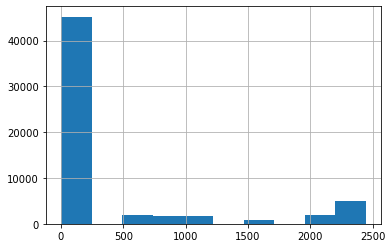

In [48]:
float_check(df.sales_amount)

In [49]:
# Проверим объем продаж
# Сначала проверим катгории товаров
# Велосипеды - самая покупаемая категория

sales_amount = df.groupby('product_category')[['sub_category','sales_amount']].max().sort_values('sales_amount', ascending = False)
sales_amount

sub_category  sales_amount
product_category                               
Bikes               Touring Bikes       2443.35
Accessories       Tires and Tubes        159.00
Clothing                    Vests         69.99

In [50]:
# Проверим теперь самый ходовой товар по категории

product_per_category = df.groupby('product_name')[['product_name','sub_category','sales_amount','customer_city']
                                                 ].max().sort_values('sales_amount', ascending = False)

In [51]:
def cost(column):
    sub_category = product_per_category[(product_per_category.sub_category == column)]['product_name'].max()
    city = product_per_category[(product_per_category.sub_category == column)]['customer_city'].max()
    return "Самый ходовой товар в категории " + column + ' : ' + sub_category + ' в городе ' + city

(*map(cost, df.sub_category.unique()),)

('Самый ходовой товар в категории Mountain Bikes : Mountain-500 Silver, 52 в городе York',
 'Самый ходовой товар в категории Fenders : Fender Set - Mountain в городе York',
 'Самый ходовой товар в категории Jerseys : Short-Sleeve Classic Jersey, XL в городе York',
 'Самый ходовой товар в категории Bottles and Cages : Water Bottle - 30 oz. в городе York',
 'Самый ходовой товар в категории Caps : AWC Logo Cap в городе York',
 'Самый ходовой товар в категории Road Bikes : Road-750 Black, 58 в городе York',
 'Самый ходовой товар в категории Helmets : Sport-100 Helmet, Red в городе York',
 'Самый ходовой товар в категории Tires and Tubes : Touring Tire Tube в городе York',
 'Самый ходовой товар в категории Touring Bikes : Touring-3000 Yellow, 62 в городе York',
 'Самый ходовой товар в категории Bike Stands : All-Purpose Bike Stand в городе Yakima',
 "Самый ходовой товар в категории Shorts : Women's Mountain Shorts, S в городе York",
 'Самый ходовой товар в категории Hydration Packs : Hydrat

### product_name

Water Bottle - 30 oz.      4244
Patch Kit/8 Patches        3191
Mountain Tire Tube         3095
Road Tire Tube             2376
Sport-100 Helmet, Red      2230
AWC Logo Cap               2190
Sport-100 Helmet, Blue     2125
Fender Set - Mountain      2121
Sport-100 Helmet, Black    2085
Mountain Bottle Cage       2025
Road Bottle Cage           1712
Touring Tire Tube          1488
HL Mountain Tire           1396
ML Mountain Tire           1161
LL Road Tire               1044
Name: product_name, dtype: int64


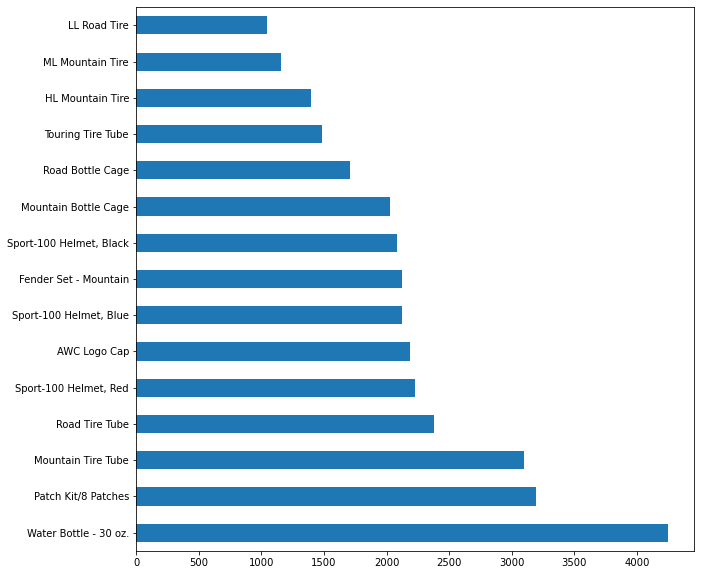

In [52]:
# Повторим действие выше и узнаем самый ходовой товар:
# Water Bottle - 30 oz.

print(df['product_name'].value_counts().head(15))
plt.rcParams['figure.figsize'] = (10,10)
product_name = df['product_name'].value_counts().nlargest(15).plot(kind='barh')

### standard_cost

count    58166.000000
mean       223.827576
std        447.191564
min          0.856500
25%          2.973300
50%         10.842300
75%         41.572300
max       1554.947900
Name: standard_cost, dtype: float64


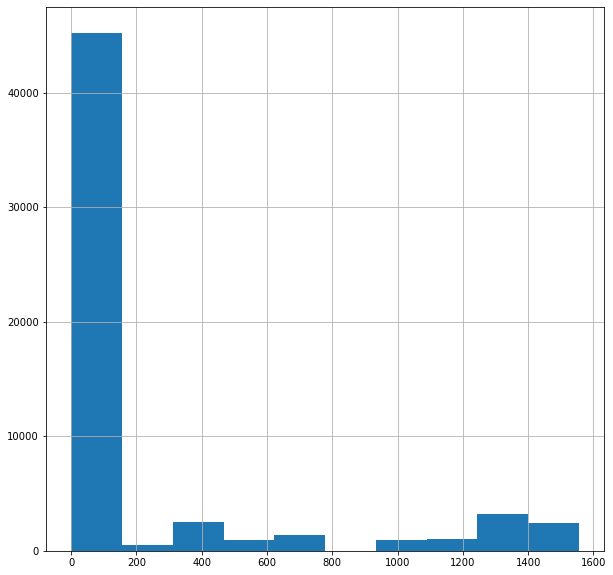

In [53]:
float_check(df.standard_cost)

In [54]:
# Сгруппируем данные, чтобы увидеть самые дорогостоящие товары по подгруппам

standard_cost = df.groupby('product_name')[['product_name','sub_category','standard_cost']].max().sort_values('standard_cost', ascending = False)

In [55]:
def cost(column):
    sub_category = standard_cost[(standard_cost.sub_category == column)]['product_name'].max()
    return "Самый дорогостоящий товар в категории " + column + ' : ' + sub_category

(*map(cost, df.sub_category.unique()),)

('Самый дорогостоящий товар в категории Mountain Bikes : Mountain-500 Silver, 52',
 'Самый дорогостоящий товар в категории Fenders : Fender Set - Mountain',
 'Самый дорогостоящий товар в категории Jerseys : Short-Sleeve Classic Jersey, XL',
 'Самый дорогостоящий товар в категории Bottles and Cages : Water Bottle - 30 oz.',
 'Самый дорогостоящий товар в категории Caps : AWC Logo Cap',
 'Самый дорогостоящий товар в категории Road Bikes : Road-750 Black, 58',
 'Самый дорогостоящий товар в категории Helmets : Sport-100 Helmet, Red',
 'Самый дорогостоящий товар в категории Tires and Tubes : Touring Tire Tube',
 'Самый дорогостоящий товар в категории Touring Bikes : Touring-3000 Yellow, 62',
 'Самый дорогостоящий товар в категории Bike Stands : All-Purpose Bike Stand',
 "Самый дорогостоящий товар в категории Shorts : Women's Mountain Shorts, S",
 'Самый дорогостоящий товар в категории Hydration Packs : Hydration Pack - 70 oz.',
 'Самый дорогостоящий товар в категории Cleaners : Bike Wash - D

In [56]:
df.to_csv (r'dataframe.csv', index = False, header=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58166 entries, 0 to 58165
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_key            58166 non-null  int64  
 1   full_name               58166 non-null  object 
 2   customer_age            58166 non-null  int64  
 3   gender                  58166 non-null  object 
 4   customer_city           58166 non-null  object 
 5   region_code             58166 non-null  object 
 6   state_code              58166 non-null  object 
 7   product_key             58166 non-null  int64  
 8   date_key                58166 non-null  int64  
 9   sales_amount            58166 non-null  float64
 10  product_name            58166 non-null  object 
 11  sub_category            58166 non-null  object 
 12  product_category        58166 non-null  object 
 13  standard_cost           58166 non-null  float64
 14  product_description     58166 non-null

In [58]:
df.month_short.value_counts()

Dec    6003
Oct    5613
Nov    5548
Jun    5343
Aug    5159
Jul    4917
Sep    4885
May    4606
Mar    4299
Apr    4198
Jan    3884
Feb    3711
Name: month_short, dtype: int64